<a href="https://colab.research.google.com/github/ksks48/Python-labs/blob/main/Khorieshko_lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Лабораторна робота №2

з дисципліни "Обробка даних Python"

---

Виконала:

студентка групи КН-221Д

Хорєшко Ксенія


---


Прийняв:

асистент кафедри

Звєрцев Г.О.

**Тема:** Використання Pandas для аналізу даних

**Мета:** Вивчення основних функцій Pandas для аналізу даних.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
file = '/content/drive/MyDrive/Обробка даних Python/NationalNames.csv'

Номер варіанту:

In [1]:
N = (9 + 4 ) % 5 + 1
print(N)

4


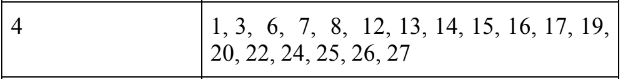

Імпорти:

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

**Завдання 1:**

Виведіть перші 8 рядків набору даних.

*Очікуваний результат:*

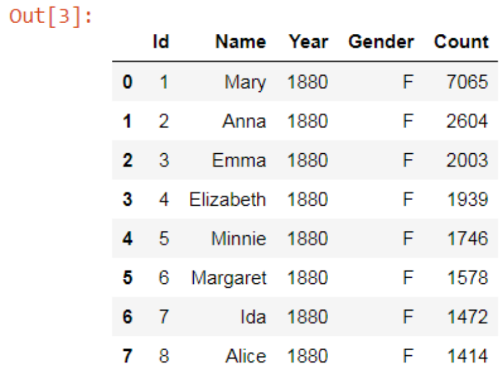

In [68]:
df = pd.read_csv(file)
df.head(8)

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746
5,6,Margaret,1880,F,1578
6,7,Ida,1880,F,1472
7,8,Alice,1880,F,1414


**Завдання 3:**

Отримайте імена стовпців набору даних.

*Очікуваний результат:*

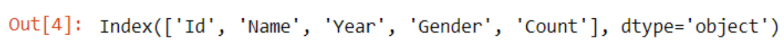

In [69]:
column_names = df.columns
print(column_names)

Index(['Id', 'Name', 'Year', 'Gender', 'Count'], dtype='object')


**Завдання 6:**

Обчисліть кількість унікальних жіночих та чоловічих імен у цілому наборі
даних.

*Очікуваний результат:*

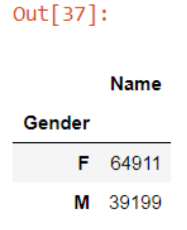

In [70]:
unique_names = df.groupby('Gender')['Name'].nunique().reset_index()
unique_names

,Gender,Name
0,F,64911
1,M,39199


**Завдання 7:**

Знайдіть 5 найпопулярніших чоловічих імен у 2010 році.

*Очікуваний результат:*

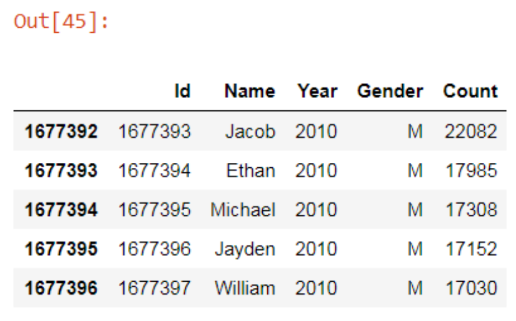

In [71]:
male_names_2010 = df[(df['Gender'] == 'M') & (df['Year'] == 2010)]
top_5 = male_names_2010.head(5)
top_5

,Id,Name,Year,Gender,Count
1677392,1677393,Jacob,2010,M,22082
1677393,1677394,Ethan,2010,M,17985
1677394,1677395,Michael,2010,M,17308
1677395,1677396,Jayden,2010,M,17152
1677396,1677397,William,2010,M,17030


**Завдання 8:**

Знайдіть найпопулярніше ім’я за результатами одного року (ім’я, для якого Count максимальне)

*Очікуваний результат:*

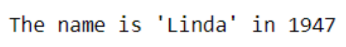

In [72]:
max_count_year = df[df['Count'] == df['Count'].max()]['Year'].values[0]
most_popular_name = df[df['Year'] == max_count_year]['Name'].values[0]
print(f"The name is '{most_popular_name}' in {max_count_year}")

The name is 'Linda' in 1947


**Завдання 12:**

Знайдіть найпопулярніше ім’я в році з найбільшою кількістю унікальних імен (тобто у 2008 році)

*Очікуваний результат:*

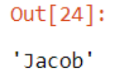

In [73]:
names_2008 = df[df['Year'] == 2008]
most_popular_name = names_2008.groupby('Name')['Count'].sum().idxmax()
print(most_popular_name)

Jacob


**Завдання 13:**

Знайдіть рік, коли ім’я “Jacob” було найпопулярнішим серед жіночих імен

*Очікуваний результат:*

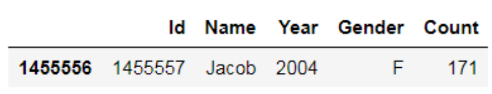

In [74]:
jacob_female = df[(df['Name'] == 'Jacob') & (df['Gender'] == 'F')]
most_popular_year = jacob_female[jacob_female['Count'] == jacob_female['Count'].max()]
most_popular_year

,Id,Name,Year,Gender,Count
1455556,1455557,Jacob,2004,F,171


**Завдання 14:**

Знайти рік із найбільшою кількістю гендерно нейтральних імен (однакові чоловічі та жіночі імена)

*Очікуваний результат:*

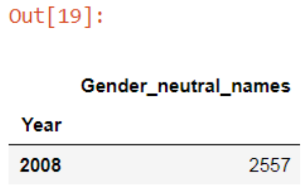

In [75]:
male_names = df[df['Gender'] == 'M']
female_names = df[df['Gender'] == 'F']

gender_neutral_names = pd.merge(male_names, female_names, on=['Name', 'Year'], how='inner')
gender_neutral_count_by_year = gender_neutral_names.groupby('Year')['Name'].count().reset_index()
most_gender_neutral_year = gender_neutral_count_by_year[gender_neutral_count_by_year['Name'] == gender_neutral_count_by_year['Name'].max()]
most_gender_neutral_year.columns = ['Year', 'Gender_neutral_name']

most_gender_neutral_year

,Year,Gender_neutral_name
128,2008,2557


**Завдання 15:**

Знайдіть загальну кількість народжень за рік.

*Очікуваний результат для перших 5 рядків:*

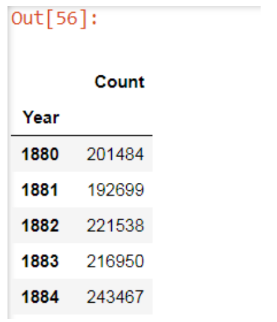

In [76]:
births_by_year = df.groupby('Year')['Count'].sum()
births_by_year.head(5)

Year
1880    201484
1881    192699
1882    221538
1883    216950
1884    243467
Name: Count, dtype: int64

**Завдання 16:**

Знайдіть рік, коли народилося найбільше дітей.

*Очікуваний результат:*

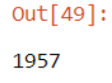

In [77]:
year_with_most_births = df.groupby('Year')['Count'].sum().idxmax()
print(year_with_most_births)

1957


**Завдання 17:**

Знайдіть кількість дівчаток та хлопчиків, які народились кожного року

*Очікуваний результат для перших 5 рідків:*

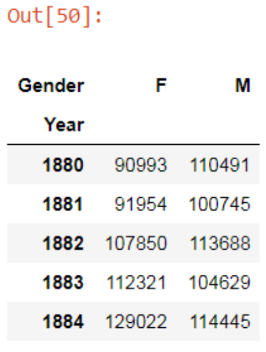

In [78]:
gender_by_year = df.groupby(['Year', 'Gender'])['Count'].sum().unstack()
gender_by_year.head(5)

Gender,F,M
Year,,
1880,90993,110491
1881,91954,100745
1882,107850,113688
1883,112321,104629
1884,129022,114445


**Завдання 19:**

Накресліть графік загальної кількості народжень хлопчиків та дівчаток на рік.

*Очікуваний результат:*

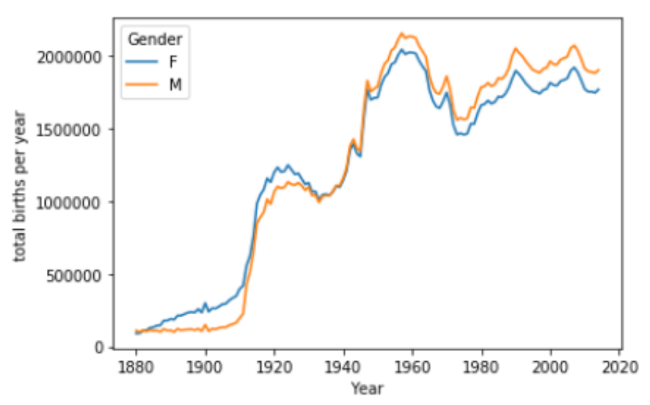

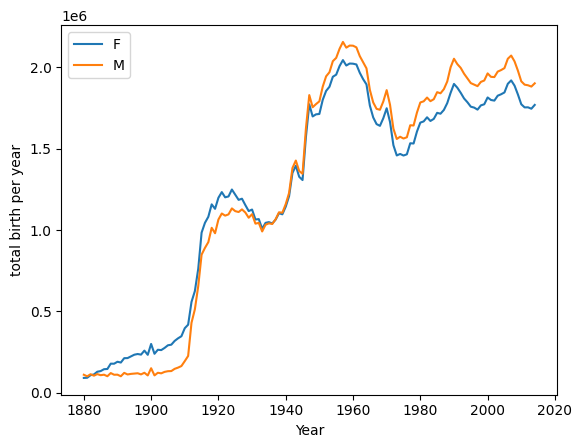

In [81]:
gender_by_year = df.groupby(['Year', 'Gender'])['Count'].sum().unstack()

gender_by_year.plot(kind='line', xlabel='Year', ylabel='total birth per year')
plt.legend(['F', 'M'])
plt.show()

**Завдання 20:**

Підрахуйте кількість гендерно нейтральних імен (однакових для дівчат та хлопців)

*Очікуваний результат:*

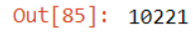

In [84]:
gender_names_count = df.groupby(['Name', 'Gender']).size().unstack()
neutral_names_count = gender_names_count[(gender_names_count['F'].notna()) & (gender_names_count['M'].notna())]
total_neutral_names = len(neutral_names_count)
print(total_neutral_names)

10221


**Завдання 22:**

Підрахуйте скільки років проводилось спостереження.

*Очікуваний результат:*

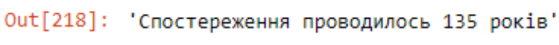

In [85]:
min_year = df['Year'].min()
max_year = df['Year'].max()
years_observed = max_year - min_year + 1

print(f"Спостереження проводились {years_observed} років")

Спостереження проводились 135 років


**Завдання 24:**

Знайти найпопулярніше серед непопулярних імен (непопулярне ім’я,
яким називали дітей найбільшу кількість разів )

*Очікуваний результат:*

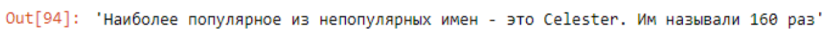

In [98]:
average_count = df['Count'].mean()
unpopular_names = df[df['Count'] < average_count]
most_popular_unpopular_name = unpopular_names[unpopular_names['Count'] == unpopular_names['Count'].max()]

print(f"Найпопулярніше серед непопулярних імен - {most_popular_unpopular_name['Name'].values[0]}. Ним називали {most_popular_unpopular_name['Count'].values[0]} разів")

Найпопулярніше серед непопулярних імен - Celester. Ним називали 160 разів


**Завдання 25:**

Побудувати графіки розподілення кількості імен John та Mary по роках
без залежності до статі.

*Очікуваний результат:*

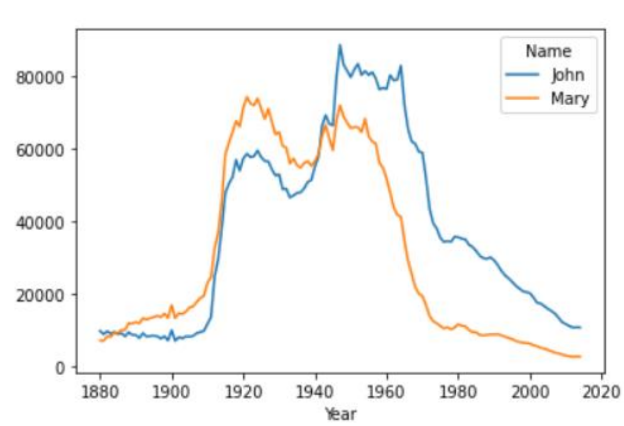

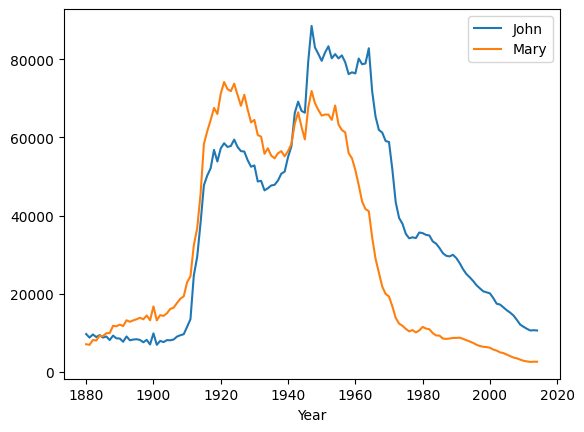

In [100]:
john_data = df[(df['Name'] == 'John')]
mary_data = df[(df['Name'] == 'Mary')]

john_mary = pd.concat([john_data, mary_data]).groupby(['Year', 'Name'])['Count'].sum().unstack()

john_mary.plot(kind='line', xlabel='Year')
plt.legend(['John', 'Mary'])
plt.show()

**Завдання 26:**

Побудувати графіки розподілення кількості жіночих імен John та
чоловічих імен Mary по роках.

*Очікуваний результат:*

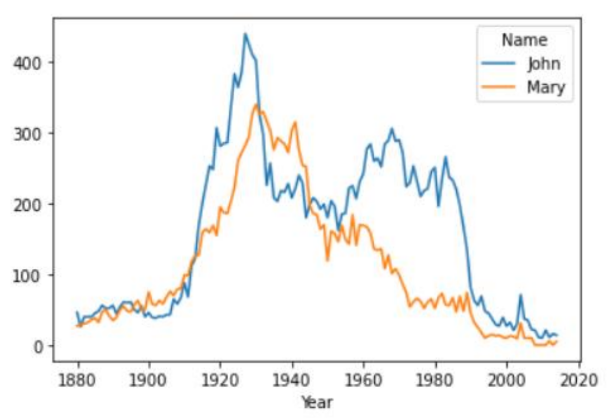

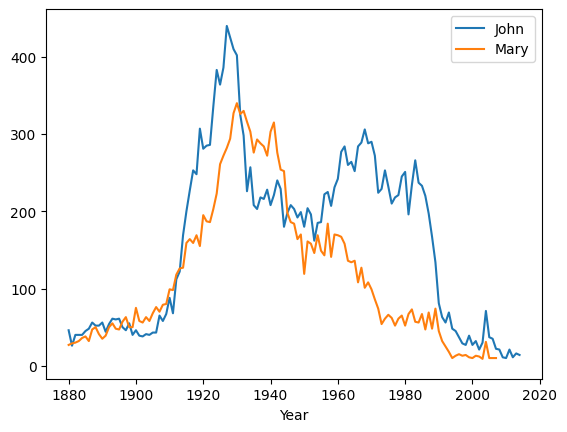

In [101]:
female_john_data = df[(df['Name'] == 'John') & (df['Gender'] == 'F')]
male_mary_data = df[(df['Name'] == 'Mary') & (df['Gender'] == 'M')]

john_mary_gender = pd.concat([female_john_data, male_mary_data]).groupby(['Year', 'Name'])['Count'].sum().unstack()

john_mary_gender.plot(kind='line', xlabel='Year')
plt.legend(['John', 'Mary'])
plt.show()

**Завдання 27:**

Знайти найпопулярніші імена в кожному році.

*Очікуваний результат:*

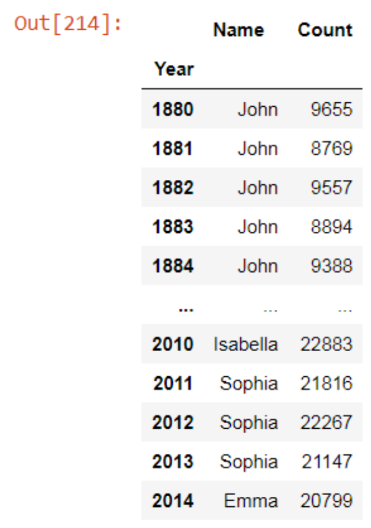

In [104]:
most_popular_names_by_year = df.groupby('Year')[['Year', 'Name', 'Count']].apply(lambda x: x.nlargest(1, columns='Count')).reset_index(drop=True)
most_popular_names_by_year

,Year,Name,Count
0,1880,John,9655
1,1881,John,8769
2,1882,John,9557
3,1883,John,8894
4,1884,John,9388
...,...,...,...
130,2010,Isabella,22883
131,2011,Sophia,21816
132,2012,Sophia,22267
133,2013,Sophia,21147


Посилання на GitHub:

**Висновок:**

У цій лабораторній роботі було набуто навички використання бібліотеки Pandas для роботи з даними на мові програмування Python, застосовано інструменти для графічної візуалізації даних і повторено вивчені раніше знання роботи з мовою програмування Python.